<a href="https://colab.research.google.com/github/BonyGeorge/Wheat-Impurities-Detection./blob/main/ResNet%2034/ResNet_34_Aug2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Resnet34 for Image Classification in fastai and PyTorch.



# Install fastai dependencies

In [1]:
!pip install fastai

In [2]:
from fastai.vision import *

# Our Augmented Dataset on Roboflow.

In [3]:
'''
from google.colab import drive
drive.mount('/content/gdrive')
'''

!curl -L "https://app.roboflow.com/ds/LwMQMyRCnP?key=Ln9dGe4rpJ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# !curl -L "https://app.roboflow.com/ds/q3Aab8OafY?key=2jgsEJN9Ue" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   889  100   889    0     0   1378      0 --:--:-- --:--:-- --:--:--  1376
100  125M  100  125M    0     0  77.7M      0  0:00:01  0:00:01 --:--:--  233M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
   creating: test/Healthy Wheat/
 extracting: test/Healthy Wheat/03ad2a35c_jpg.rf.0a822087a149a463394ba53f7a0d1d4c.jpg  
 extracting: test/Healthy Wheat/0a029eead_jpg.rf.7334cef7e5cc92dd5dc521287b604c49.jpg  
 extracting: test/Healthy Wheat/0b47876ec_jpg.rf.3af82b0562da2708eebaab910f91f592.jpg  
 extracting: test/Healthy Wheat/0b9624bd4_jpg.rf.33da4feec90472238507ad331b62f7e7.jpg  
 extracting: test/Healthy Wheat/0d7268752_jpg.rf.f099e30c9fb73872f5ec1f9e754bf750.jpg  
 extracting: test/Healthy Wheat/0e0809a3d_jpg.rf.7779619dd676ba62921a16094ae32ab9.jpg  
 extracting: test/Healthy Wheat/0e0a0483e_j

In [ ]:
'''
!unzip /content/gdrive/MyDrive/DATASET/train.zip -d augdataset
!unzip /content/gdrive/MyDrive/DATASET/test.zip -d augdataset
!unzip /content/gdrive/MyDrive/DATASET/val.zip -d augdataset
'''

In [4]:
# Build fastai dataset loader.
np.random.seed(42)
path = Path('/content/')
data = ImageDataBunch.from_folder(path, size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [5]:
# Check the data classes.
data.classes

['Healthy Wheat', 'Leaf Rust', 'Stem Rust', 'Wild Oat']

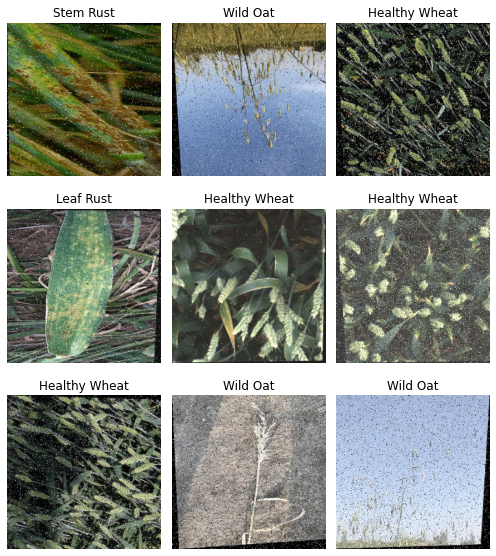

In [6]:
# Show Batch Images.
data.show_batch(rows=3, figsize=(7, 8))

# Set up fastai Resnet model

In [7]:
from fastai.metrics import error_rate
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [8]:
# Print Network Layers.
learn

Learner(data=ImageDataBunch;

Train: LabelList (1791 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat
Path: /content;

Valid: LabelList (170 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat
Path: /content;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

# Train Custom Resnet Image Classifier

In [9]:
from fastai.callbacks import *
early_stop = EarlyStoppingCallback(learn, patience=20)
save_best_model = SaveModelCallback(learn, name='best_resnet34')

In [10]:
defaults.device = torch.device('cuda')
learn.fit_one_cycle(2, callbacks=[early_stop, save_best_model])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 0.1927960067987442.


In [11]:
# Load Best Model.
learn.load('best_resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (1791 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat
Path: /content;

Valid: LabelList (170 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat
Path: /content;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

In [12]:
learn.unfreeze()

In [13]:
def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    # Run the Learning Rate Finder.
    model.lr_find()
    
    # Get loss values and their corresponding gradients, and get lr values.
    losses = np.array(model.recorder.losses)
    min_loss_index = np.argmin(losses)
    

    lrs = model.recorder.lrs
    
    # Return the Learning Rate that produces the minimum loss divide by 10.   
    return lrs[min_loss_index] / 10

In [14]:
optimal_lr = find_appropriate_lr(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [15]:
learn.fit_one_cycle(1, max_lr=slice(optimal_lr/10, optimal_lr), callbacks=[early_stop, save_best_model])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 0.20331217348575592.


In [16]:
learn.load('best_resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (1791 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat
Path: /content;

Valid: LabelList (170 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat,Healthy Wheat
Path: /content;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

# Evaluate Classifier Performance

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


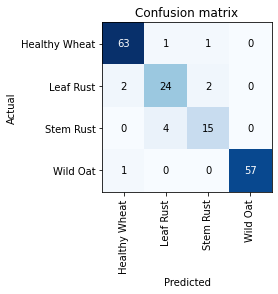

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

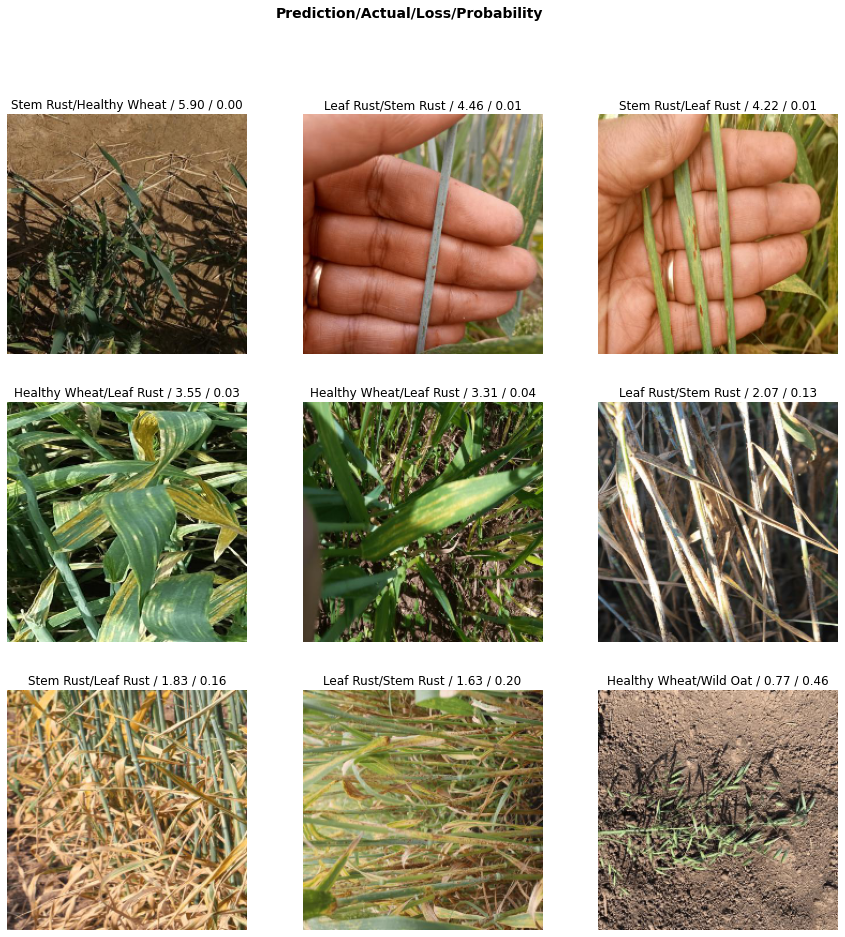

In [18]:
interp.plot_top_losses(9, figsize=(15,15))

/content/test/Healthy Wheat/4a654c127_jpg.rf.100af073a83aae019dcf41bc1c7052c6.jpg
Healthy Wheat


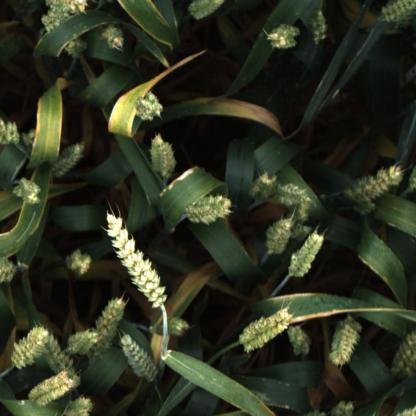



/content/test/Healthy Wheat/4a44720ca_jpg.rf.680dd8477d8f7105e8e7799e6e910285.jpg
Healthy Wheat


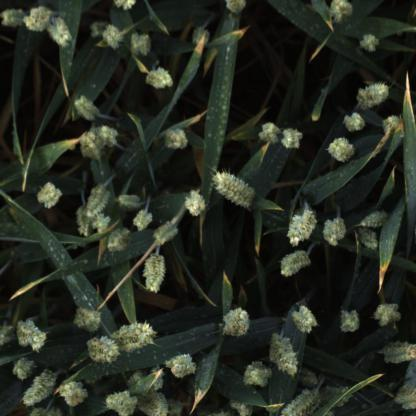



/content/test/Healthy Wheat/2dc5dd23d_jpg.rf.ecacb9a4469ad69fa401af454272399e.jpg
Healthy Wheat


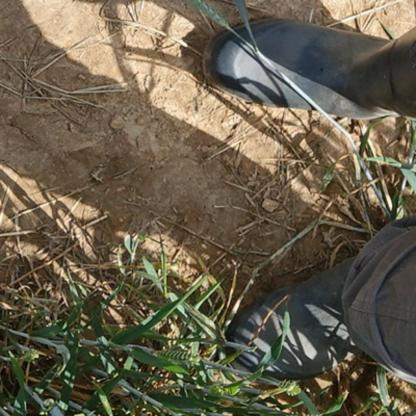



/content/test/Healthy Wheat/4b83b6541_jpg.rf.b7f41ab0c01573cd11ce7907e1d1cc00.jpg
Healthy Wheat


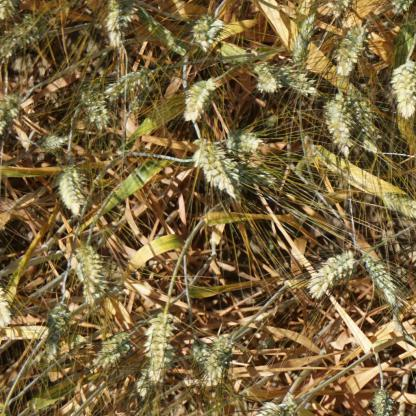



/content/test/Healthy Wheat/3e5845bc4_jpg.rf.adbac249ad9830eeb8d7b784da0a30de.jpg
Healthy Wheat


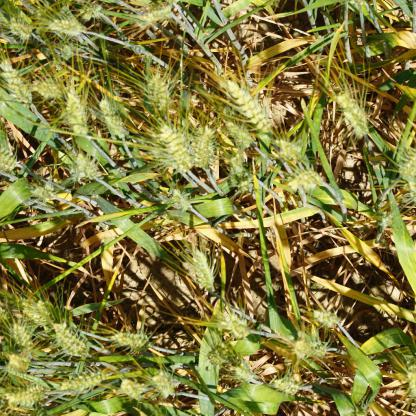



/content/test/Healthy Wheat/1ecc491e7_jpg.rf.afb8f1ecf29191e298a1042a33e936a1.jpg
Healthy Wheat


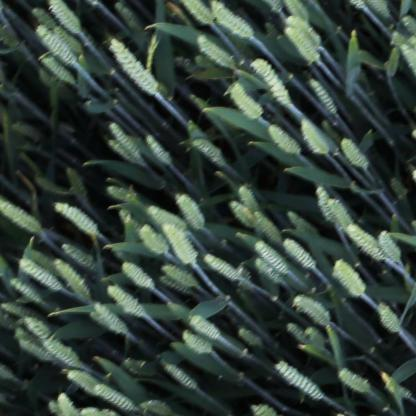



/content/test/Healthy Wheat/0f4911203_jpg.rf.1bec588b84e1f6e1fb2724425df63835.jpg
Healthy Wheat


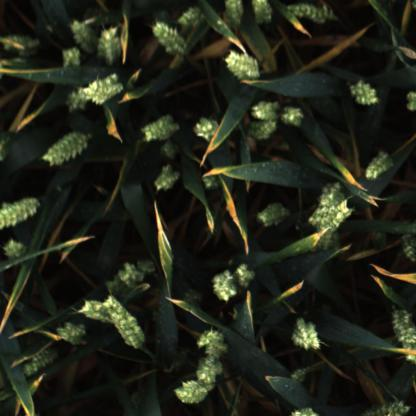



/content/test/Healthy Wheat/3b4627945_jpg.rf.3708f98886290ff90ff631773e972cce.jpg
Healthy Wheat


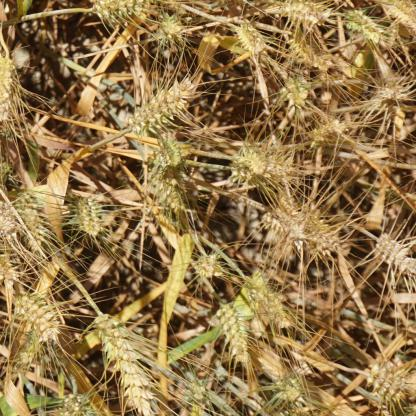



/content/test/Healthy Wheat/0d7268752_jpg.rf.f099e30c9fb73872f5ec1f9e754bf750.jpg
Healthy Wheat


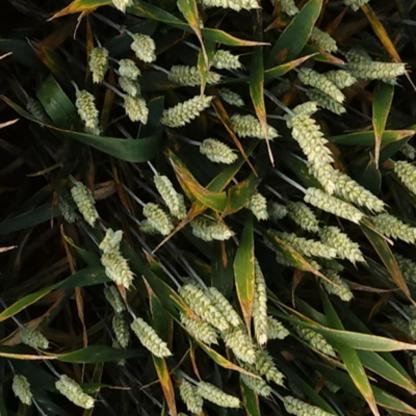



/content/test/Healthy Wheat/03ad2a35c_jpg.rf.0a822087a149a463394ba53f7a0d1d4c.jpg
Healthy Wheat


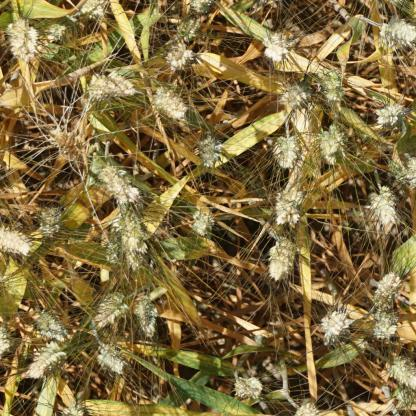



/content/test/Healthy Wheat/0eab1baab_jpg.rf.4d010d96e549f434e1ea7267baa8316d.jpg
Healthy Wheat


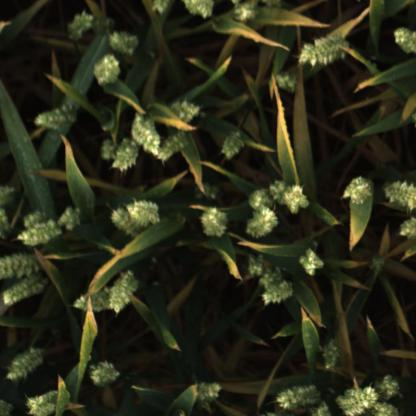



/content/test/Healthy Wheat/0ebac9a23_jpg.rf.8837ea08135b1a72e36c03314f70d5a2.jpg
Healthy Wheat


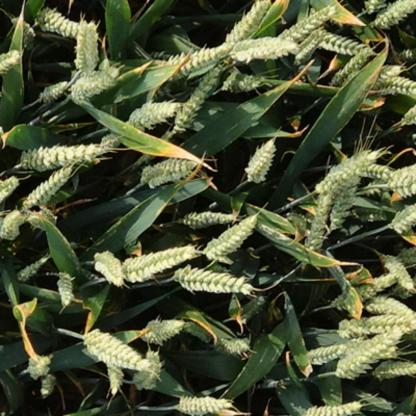



/content/test/Healthy Wheat/3ef86180e_jpg.rf.06da7667b285024793bf65f01ba2d0d5.jpg
Healthy Wheat


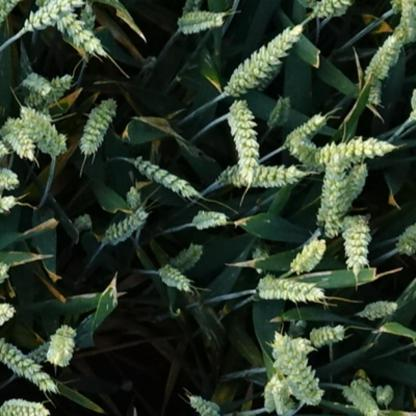



/content/test/Healthy Wheat/4ae7a034a_jpg.rf.86d54a05d0689820fdce7fd091c43215.jpg
Healthy Wheat


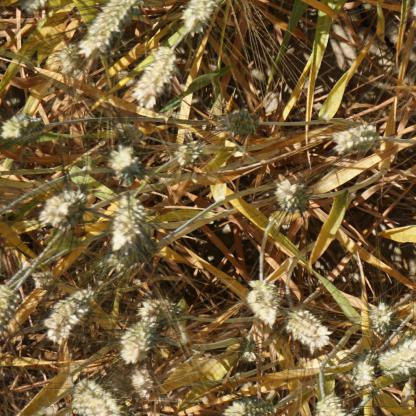



/content/test/Healthy Wheat/2d635716b_jpg.rf.643dab0cd3004244015f7cfbe8888e46.jpg
Healthy Wheat


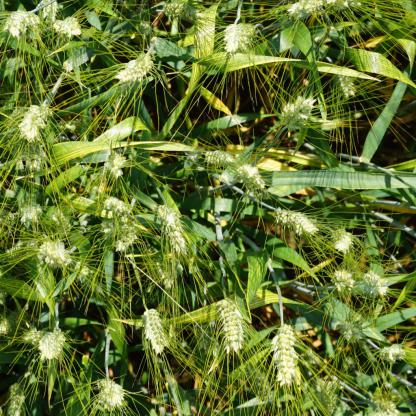



/content/test/Healthy Wheat/0b9624bd4_jpg.rf.33da4feec90472238507ad331b62f7e7.jpg
Healthy Wheat


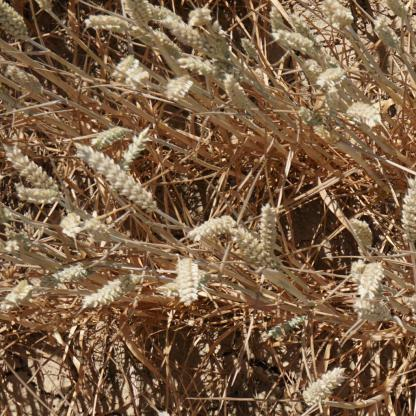



/content/test/Healthy Wheat/0e0809a3d_jpg.rf.7779619dd676ba62921a16094ae32ab9.jpg
Healthy Wheat


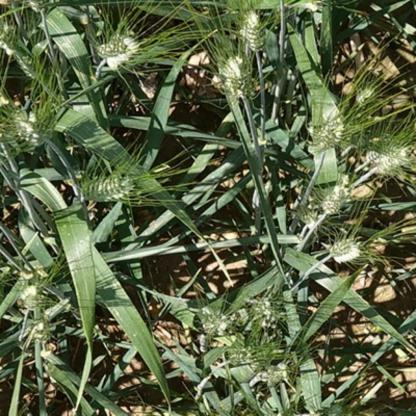



/content/test/Healthy Wheat/0a029eead_jpg.rf.7334cef7e5cc92dd5dc521287b604c49.jpg
Healthy Wheat


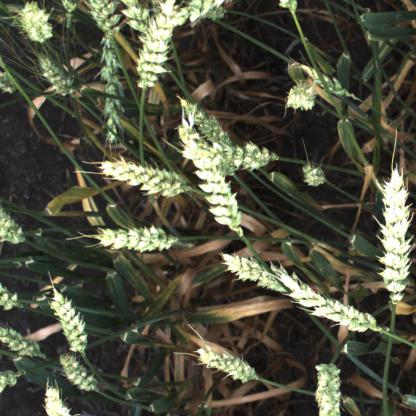



/content/test/Healthy Wheat/3eece2a34_jpg.rf.b97a4a74d95844ce220e23897a009b16.jpg
Healthy Wheat


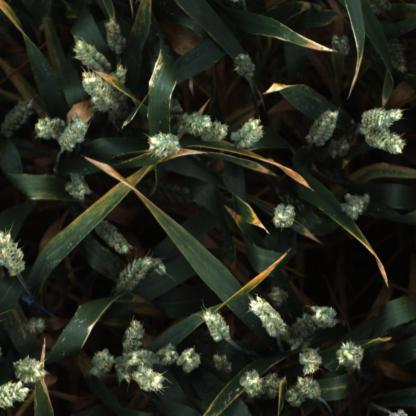



/content/test/Healthy Wheat/3c2b5bd45_jpg.rf.116754d9cc74ea76671540dcb1bc2d8c.jpg
Healthy Wheat


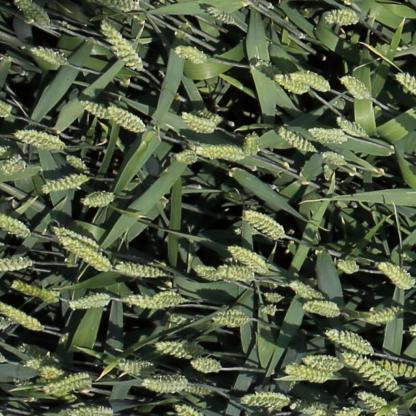



/content/test/Healthy Wheat/0e0a0483e_jpg.rf.4890c87cea840e4744a5fbb2b2d195ca.jpg
Healthy Wheat


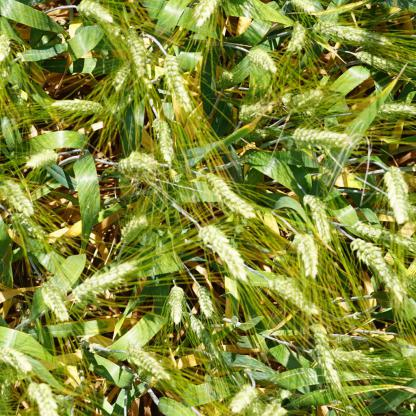



/content/test/Healthy Wheat/1f7600e2c_jpg.rf.5c2814103ed652a1f517fbb484d85236.jpg
Healthy Wheat


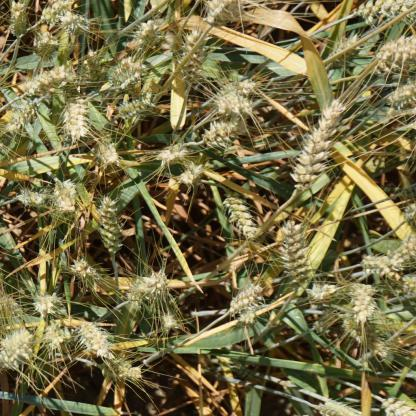



/content/test/Healthy Wheat/1f9a8abcd_jpg.rf.3d344cd4090bd01c737b712932b92630.jpg
Healthy Wheat


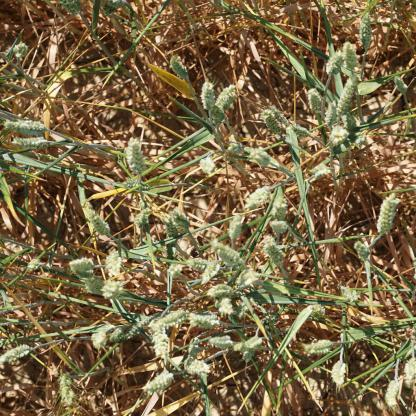



/content/test/Healthy Wheat/2cc75e9f5_jpg.rf.8d85e98d3e3c1243d91d93edf18bfefc.jpg
Healthy Wheat


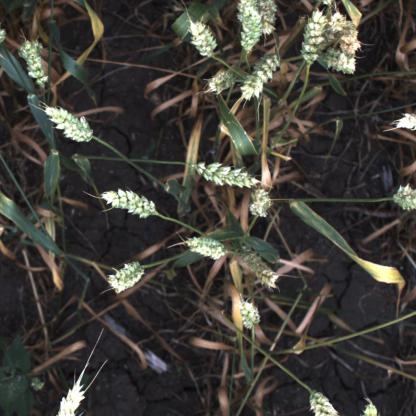



/content/test/Healthy Wheat/2de7cc0c9_jpg.rf.9082b4bae5f14ab99cb15d4e1e1af6cb.jpg
Healthy Wheat


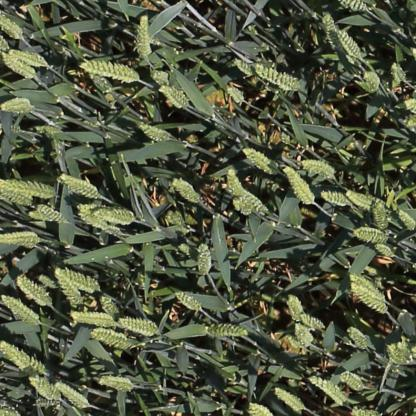



/content/test/Healthy Wheat/3dd0a7c0e_jpg.rf.04a8e44ff8f319e925d07263f858a10c.jpg
Healthy Wheat


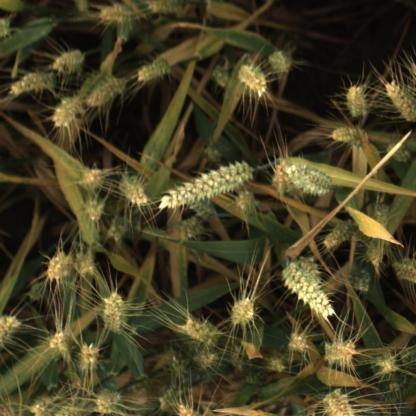



/content/test/Healthy Wheat/0b47876ec_jpg.rf.3af82b0562da2708eebaab910f91f592.jpg
Healthy Wheat


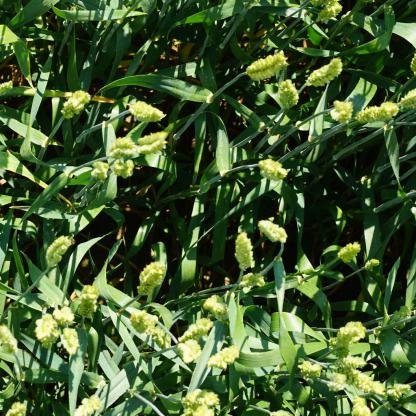



/content/test/Leaf Rust/2LNW3I_png.rf.742bc513f1961606fb9ac747b17edce9.jpg
Leaf Rust


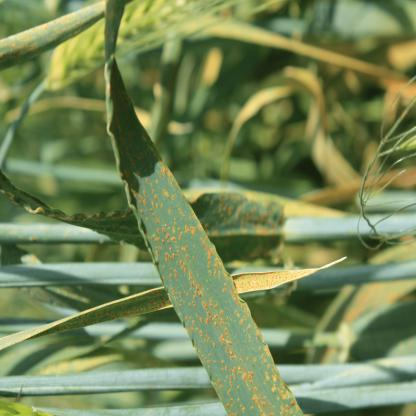



/content/test/Leaf Rust/XGQH0X_png.rf.c03bae71e198d1a92858e52541b09787.jpg
Healthy Wheat


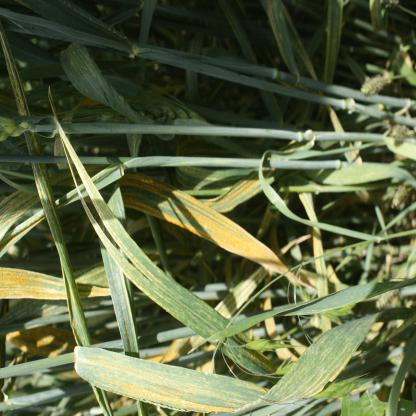



/content/test/Leaf Rust/94FX3I_png.rf.047b4a95139c8255629e40808d27a707.jpg
Leaf Rust


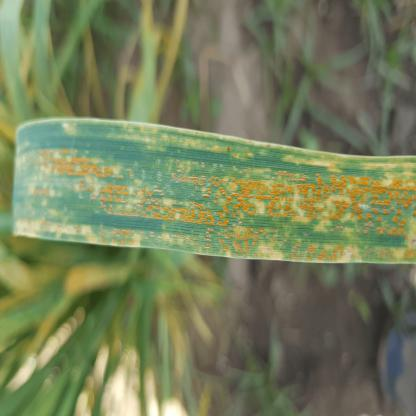



/content/test/Leaf Rust/MRCH2D_jpg.rf.ada19221e5d8e888f66e10f1639dbccb.jpg
Healthy Wheat


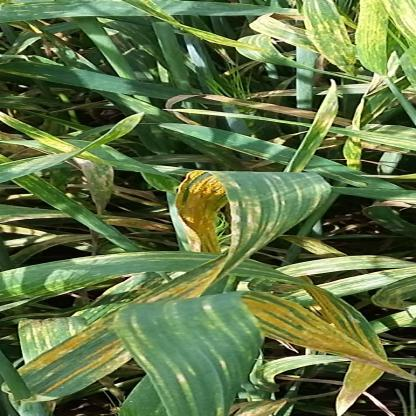



/content/test/Leaf Rust/RNZSNN_png.rf.f9a5b1fe38256377345bc72bcc20dad0.jpg
Leaf Rust


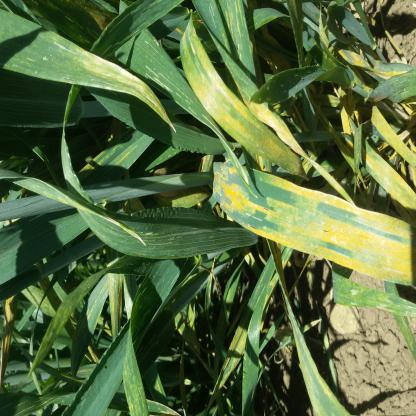



/content/test/Leaf Rust/6JRBHF_png.rf.037fa21cc097bc15ec001ff8236cedac.jpg
Leaf Rust


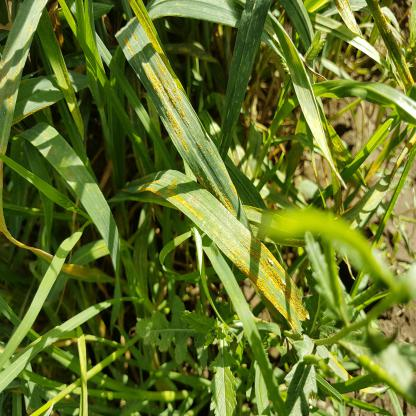



/content/test/Leaf Rust/PAO1SW_jpg.rf.611a24635176632dbc1a833a4f5bdcaf.jpg
Leaf Rust


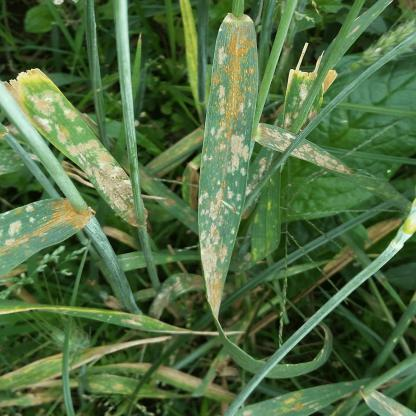



/content/test/Leaf Rust/Y5F2K2_png.rf.f0c29ff62554cc37bf2eb8314f2497bd.jpg
Leaf Rust


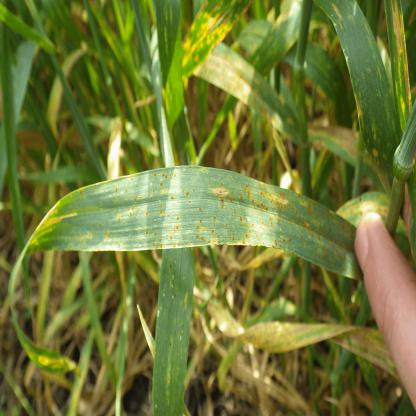



/content/test/Leaf Rust/KQQQ9G_jpg.rf.a8252d87f03f1a875eaf8a4fde32f3b4.jpg
Healthy Wheat


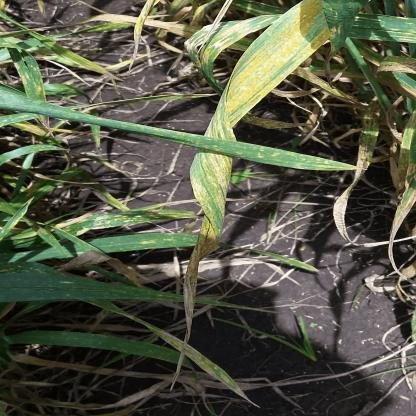



/content/test/Leaf Rust/BH9GXF_png.rf.711e084d926e951bb3593ca4ee4029d8.jpg
Leaf Rust


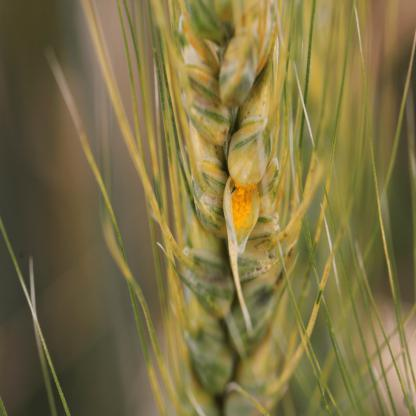



/content/test/Leaf Rust/65XWCM_png.rf.0dc68a46673371e08bd33a697b936faf.jpg
Leaf Rust


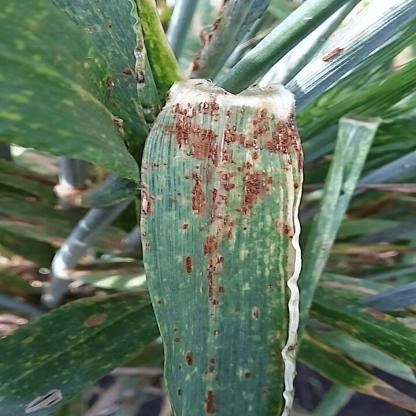



/content/test/Leaf Rust/TUG4XL_jpg.rf.c0b8a4b3d8710def754bf2cf66144bad.jpg
Stem Rust


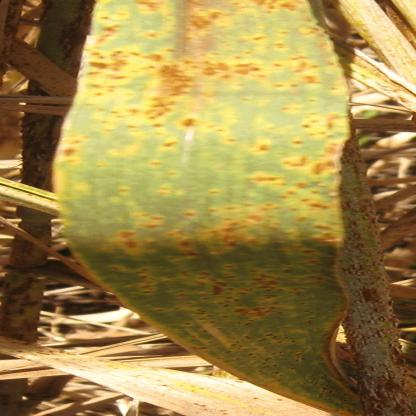



/content/test/Leaf Rust/W56FTE_png.rf.a2d623d17cc5b1efc8e5096803bd4a5d.jpg
Leaf Rust


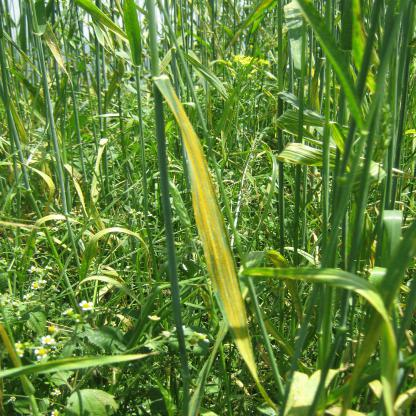



/content/test/Leaf Rust/0W9XLD_png.rf.ed09d07b2736a685a518257740b910e3.jpg
Leaf Rust


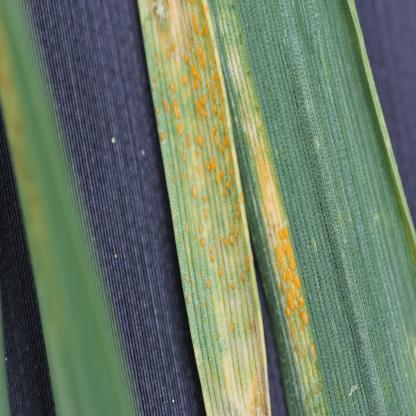



/content/test/Leaf Rust/1UJRRG_png.rf.f9fac5796c0d7f0e2253dc7379b5fdef.jpg
Leaf Rust


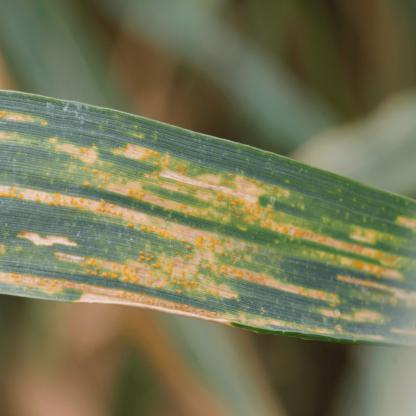



/content/test/Wild Oat/WildOat-270-_jpg.rf.46b53907a6b2ea1fffe063bb55267a12.jpg
Wild Oat


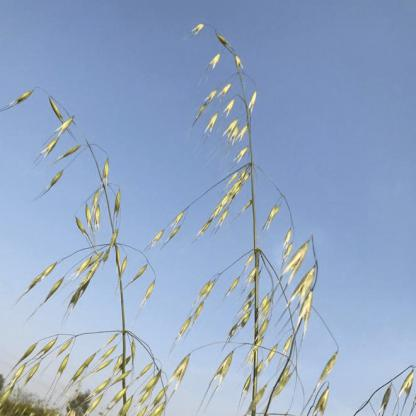



/content/test/Wild Oat/WildOat-330-_png.rf.33b94bc0ebbebf7287e8ca821259ab59.jpg
Wild Oat


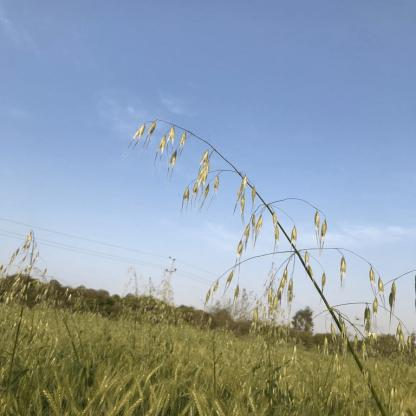



/content/test/Wild Oat/WildOat-252-_jpg.rf.a3875390485970e3e5095e8a8259ceb8.jpg
Wild Oat


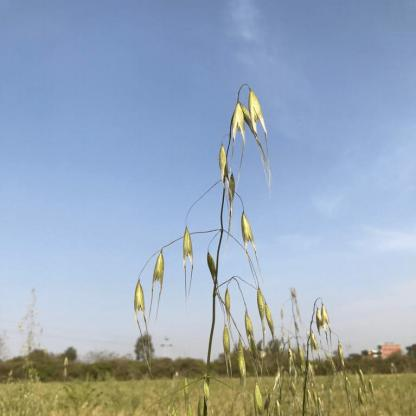



/content/test/Wild Oat/WildOat--112-_jpg.rf.6f0db4d25a3df2579c2e46376c7e668b.jpg
Wild Oat


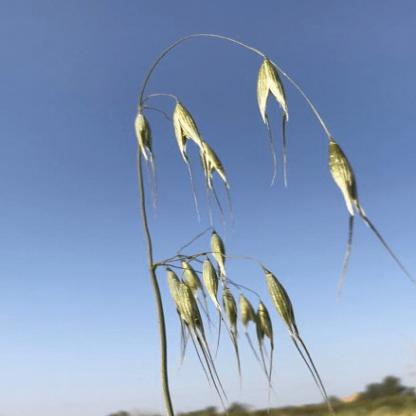



/content/test/Wild Oat/WildOat--82-_jpg.rf.7a9d32a91903c8d3976d0ce7b3a81dd6.jpg
Wild Oat


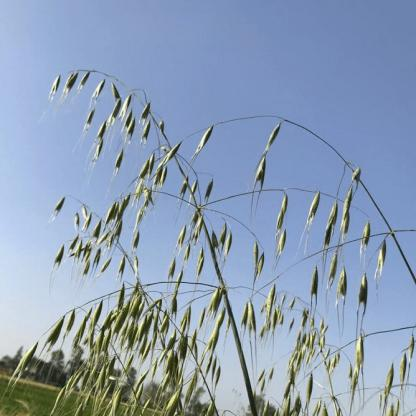



/content/test/Wild Oat/WildOat--470-_png.rf.e4f2b3a7e1598479c190cee74197b4e4.jpg
Wild Oat


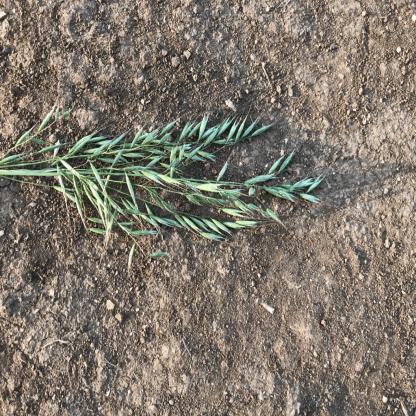



/content/test/Wild Oat/WildOat-302-_jpg.rf.6430849c7a8fb629a55233255bd0e6e7.jpg
Wild Oat


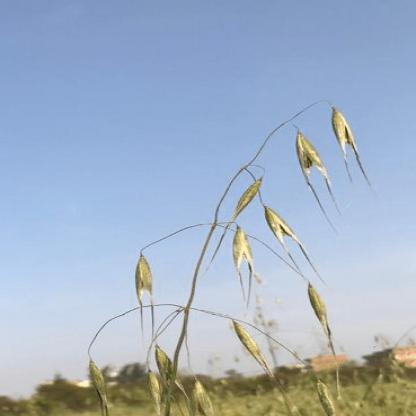



/content/test/Wild Oat/WildOat--74-_jpg.rf.802089d3d175c8499c9f4e9d716a0c1a.jpg
Wild Oat


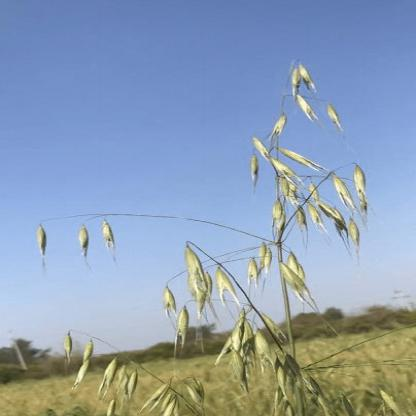



/content/test/Wild Oat/WildOat--464-_png.rf.0e8425a41cc90a4f3634e23d817d98d4.jpg
Wild Oat


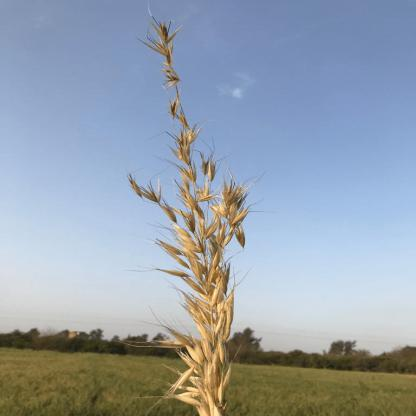



/content/test/Wild Oat/WildOat-262-_jpg.rf.8d14a3e84c50e79e298dc9bdd1c0483e.jpg
Wild Oat


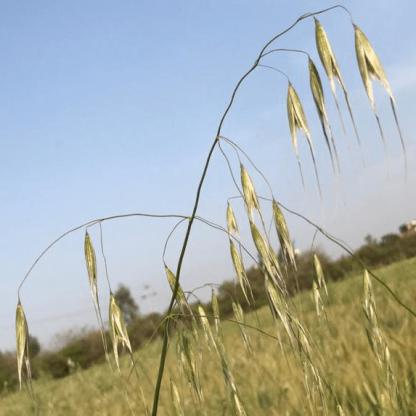



/content/test/Wild Oat/WildOat-315-_jpg.rf.d62e83e4b5eb490411d867869778bb01.jpg
Wild Oat


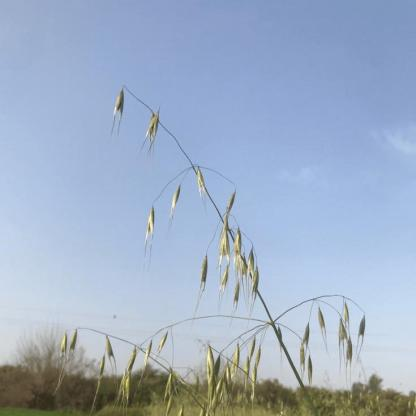



/content/test/Wild Oat/WildOat--125-_jpg.rf.86426d5fef897e6d36bf1683d49f43a2.jpg
Wild Oat


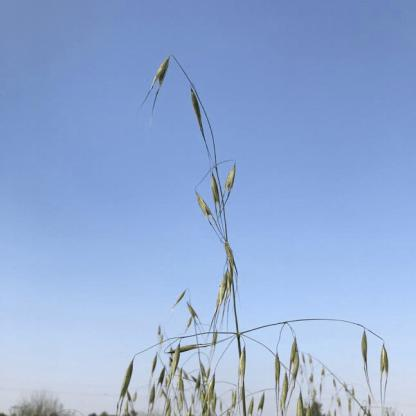



/content/test/Wild Oat/WildOat-246-_png.rf.2a993c479e316efc1929fc180ecf6dd1.jpg
Wild Oat


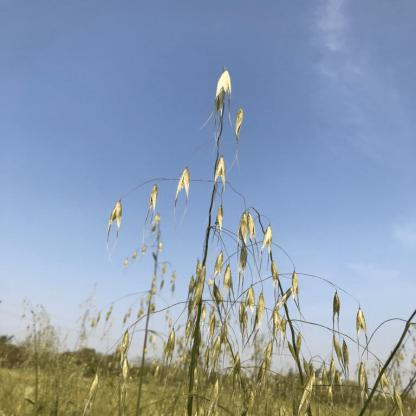



/content/test/Wild Oat/WildOat--471-_png.rf.c19952cfe097b6371f5b6c66261d6126.jpg
Wild Oat


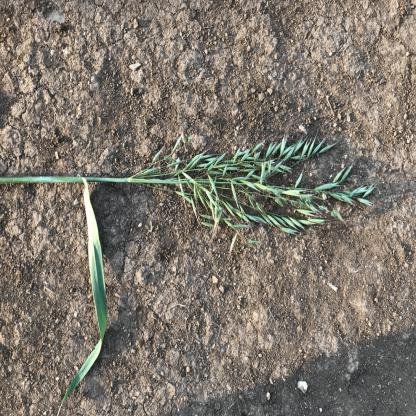



/content/test/Wild Oat/WildOat--63-_jpg.rf.89441c51d71c40b198acef8214dc02a5.jpg
Wild Oat


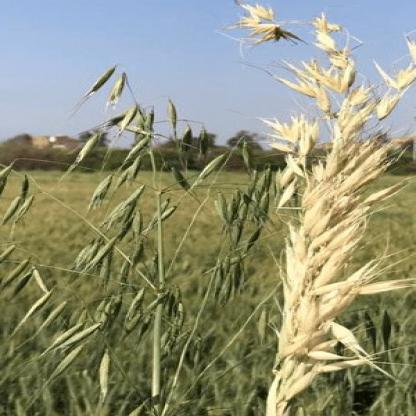



/content/test/Wild Oat/WildOat--36-_png.rf.c693e3114c9fd0869bb0dfbfdf314605.jpg
Wild Oat


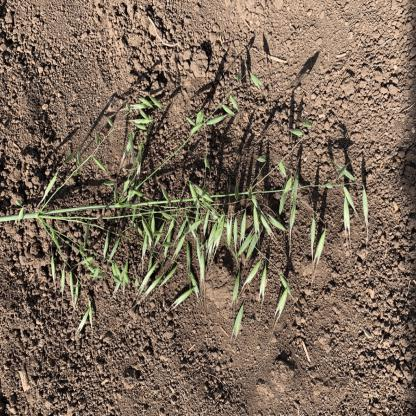



/content/test/Wild Oat/WildOat--135-_jpg.rf.44490d97e0a3f51049bf1caddaab4013.jpg
Wild Oat


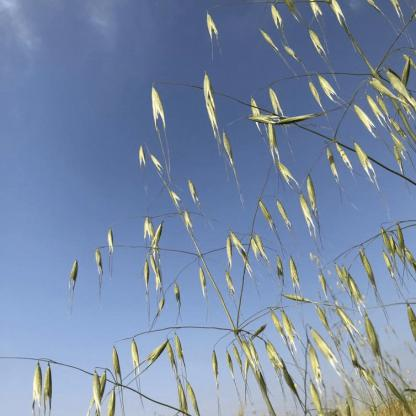



/content/test/Wild Oat/WildOat-292-_jpg.rf.8083baffb29b45a38f33b397764988b6.jpg
Wild Oat


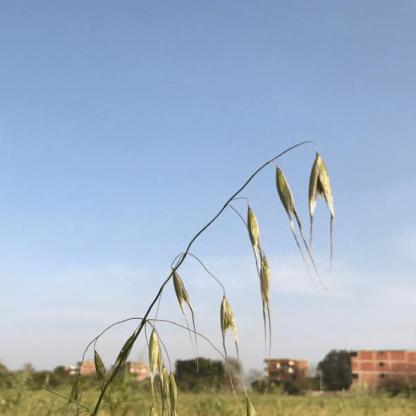



/content/test/Wild Oat/WildOat-294-_png.rf.2d22c45e8f73a7f531e85ae031956097.jpg
Wild Oat


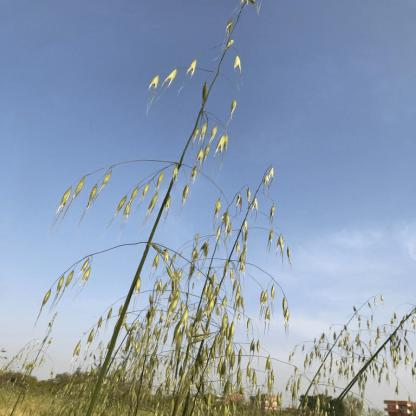



/content/test/Wild Oat/WildOat-283-_jpg.rf.51c0d14f14f2fb266230e2021af66c72.jpg
Wild Oat


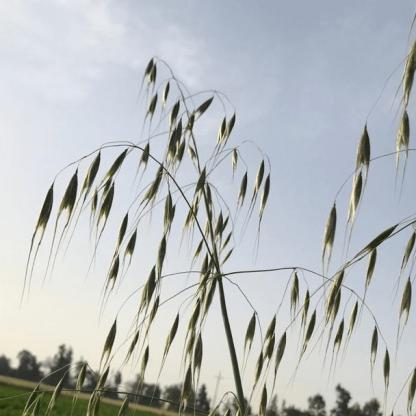



/content/test/Wild Oat/WildOat-311-_jpg.rf.0f204d77d2b838b56c42f3fb912859dc.jpg
Wild Oat


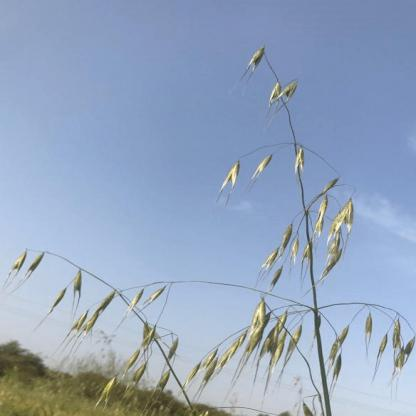



/content/test/Wild Oat/WildOat-289-_jpg.rf.2cbae3a7420636407ca8f78da931e81a.jpg
Wild Oat


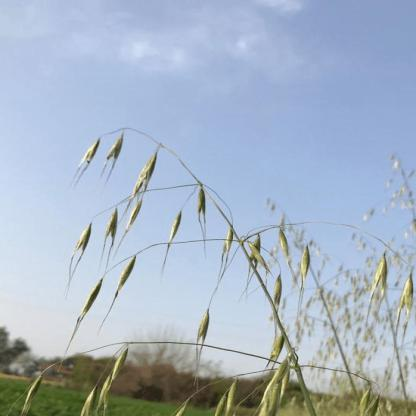



/content/test/Wild Oat/WildOat--94-_png.rf.38d568266313643623385b5ef7e059e4.jpg
Wild Oat


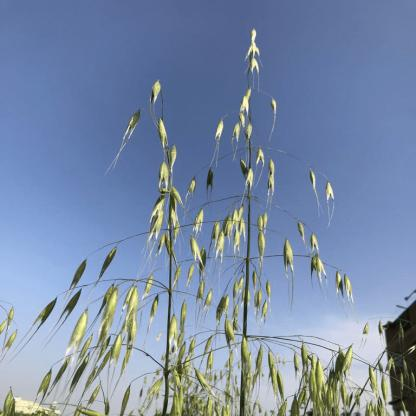



/content/test/Wild Oat/WildOat--454-_png.rf.0e90ff9c10f7b173112f53f75e5af88e.jpg
Wild Oat


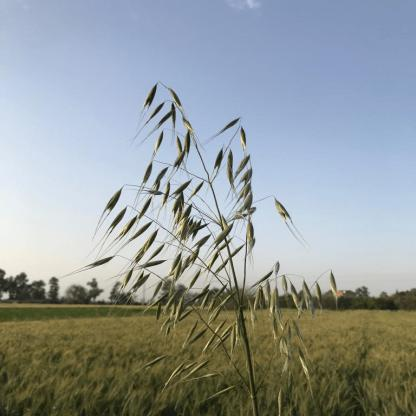



/content/test/Wild Oat/WildOat-268-_png.rf.f0f5ee0e953da95ce9fbc1d6fb415ccd.jpg
Wild Oat


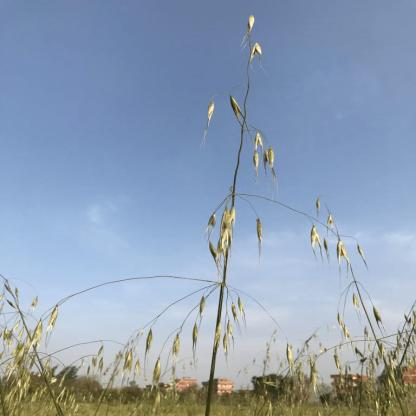



/content/test/Wild Oat/WildOat-251-_png.rf.ca47bd2acd4fe4ad4315910554bd0818.jpg
Wild Oat


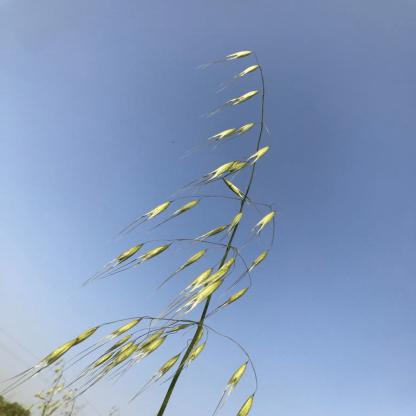



/content/test/Wild Oat/WildOat--458-_png.rf.4761c2fbcab09eb4407480f809311a12.jpg
Wild Oat


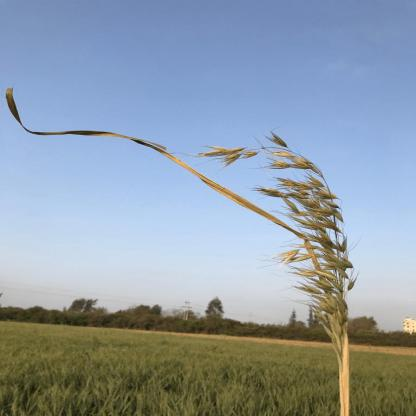



/content/test/Wild Oat/WildOat-312-_jpg.rf.5943ba8355ab0a37fe62e96e0a8db8a7.jpg
Wild Oat


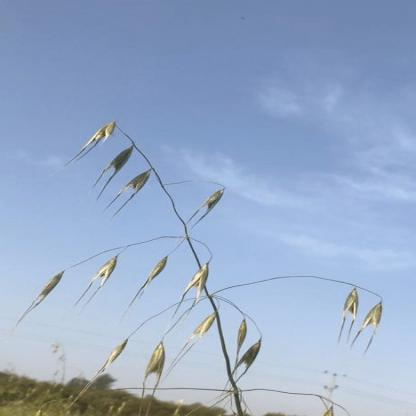



/content/test/Wild Oat/WildOat--102-_jpg.rf.23ebc463b2c5712a551c976c37e291a2.jpg
Wild Oat


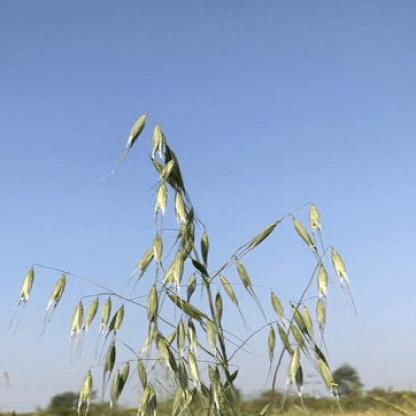



/content/test/Wild Oat/WildOat--53-_jpg.rf.3715396eb8f2e0b70b114977a7f7b18d.jpg
Wild Oat


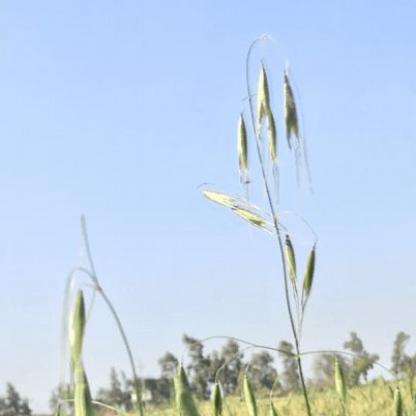



/content/test/Wild Oat/WildOat--455-_jpg.rf.d2a41e1027d89f1059ede7fc005d61e2.jpg
Wild Oat


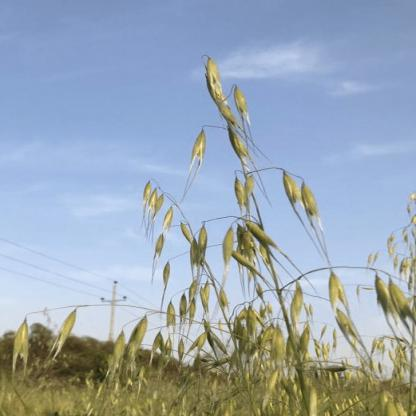



/content/test/Wild Oat/WildOat-265-_jpg.rf.6bc91f95824ac9da3c266955d5943f52.jpg
Wild Oat


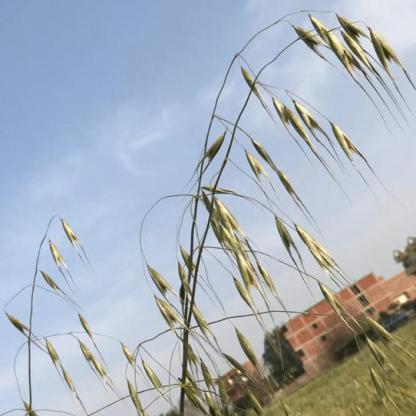



/content/test/Stem Rust/Z2FBRE_jpg.rf.a22a4e2f03a7f3a2d95624430cbb7094.jpg
Stem Rust


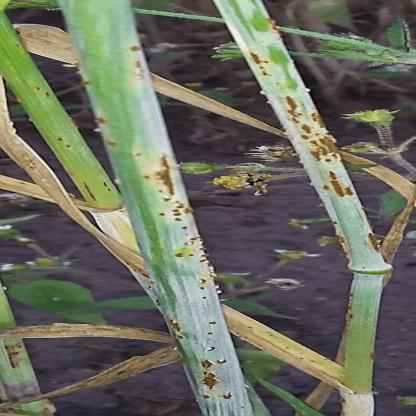



/content/test/Stem Rust/O03SHZ_png.rf.bc297d3ad398d67cd8220a3e944bd262.jpg
Stem Rust


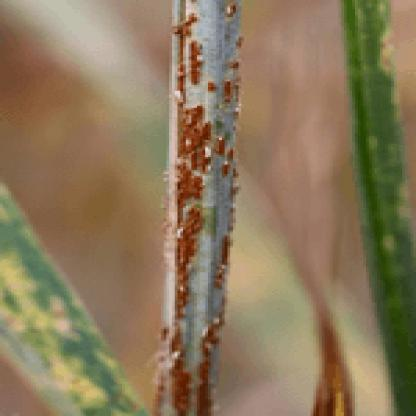



/content/test/Stem Rust/UPBU5E_png.rf.069a645ebe2d26fb57f45b0939a48fff.jpg
Stem Rust


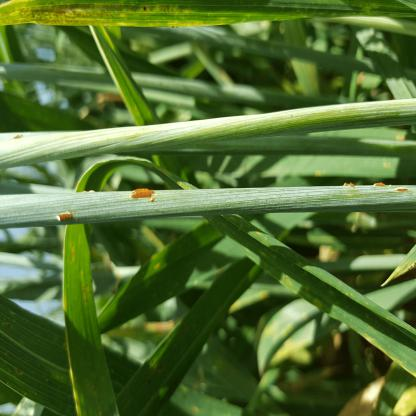



/content/test/Stem Rust/7GKM8T_jpg.rf.f4b8d3d254e24dee216c1ef5b7b8e19d.jpg
Stem Rust


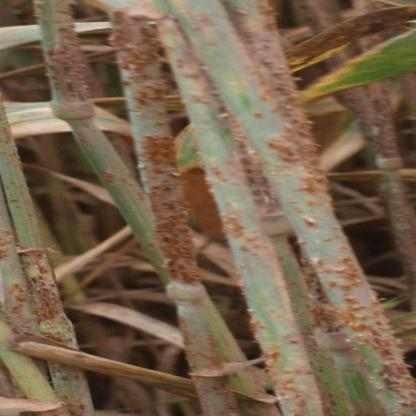



/content/test/Stem Rust/HQF2QD_png.rf.b9f0c4861a14b3112c97f0a8e08b473a.jpg
Stem Rust


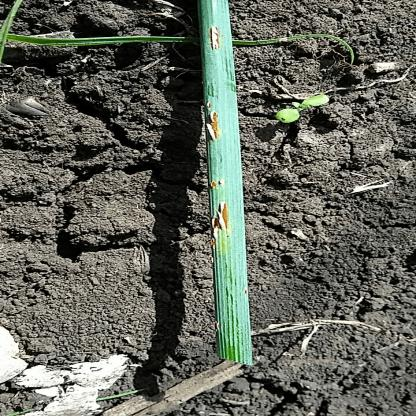



/content/test/Stem Rust/KDERDV_png.rf.440f0833467fa4a3a7b06304c8b56d25.jpg
Stem Rust


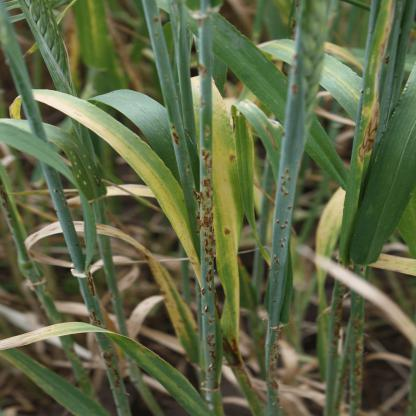



/content/test/Stem Rust/MSUABZ_png.rf.3357f574ca20a87dae6a9b2705df0cdd.jpg
Stem Rust


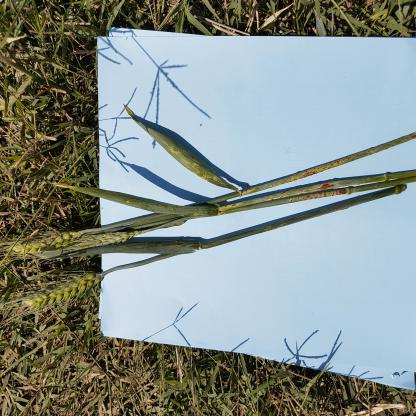



/content/test/Stem Rust/BLBE0Y_jpg.rf.65d71b7ad7bae6a015e726325e8b273e.jpg
Stem Rust


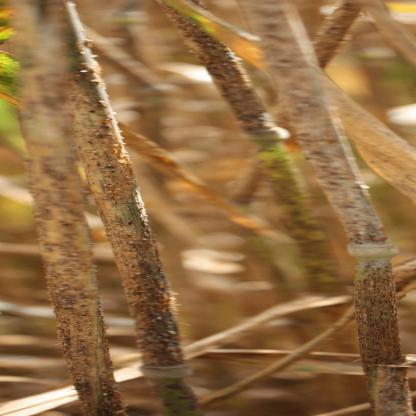



/content/test/Stem Rust/0HA9AT_jpg.rf.cab4e218bd1ac161403f74dc75cf51e3.jpg
Leaf Rust


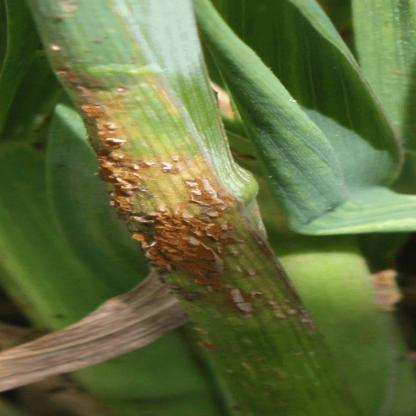



/content/test/Stem Rust/9C1MPX_jpg.rf.0bb894f50d98b4dda301e3d5ac109d2e.jpg
Stem Rust


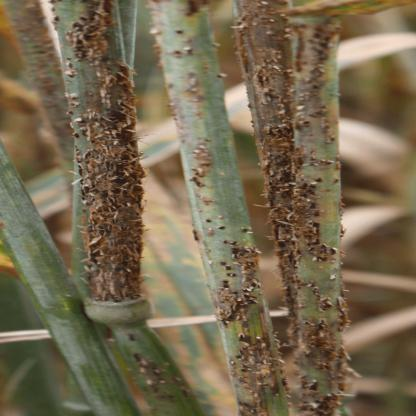



/content/test/Stem Rust/USE5QD_png.rf.f76e7597f7634e78f897c4420deccfd8.jpg
Leaf Rust


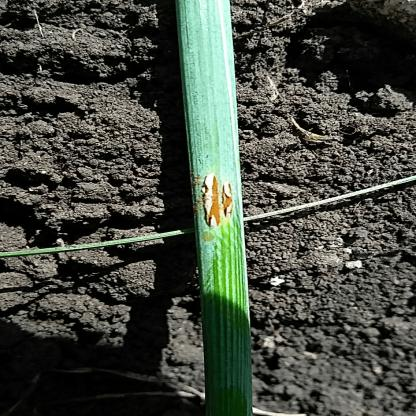

In [19]:
# Test & Predict.
import glob
from IPython.display import Image, display

model = learn.model
model = model.cuda()
for imageName in glob.glob('/content/test/*/*.jpg'):
    print(imageName)
    img = open_image(imageName)
    prediction = learn.predict(img)
    print(prediction[0])
    display(Image(filename=imageName))
    print("\n")

# Save custom classification model for future use

In [20]:
%ls models/

best_resnet34.pth  tmp.pth


In [21]:
from google.colab import files
files.download('./models/best_resnet34.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>